In [1]:
!pip install gosling
import gosling as gos
from gosling.data import multivec, csv

# Datasets

In [2]:
mv = multivec(
    url="https://server.gosling-lang.org/api/v1/tileset_info/?d=cistrome-multivec",
    row="sample",
    column="position",
    value="peak",
    categories=["sample 1", "sample 2", "sample 3", "sample 4"],
    binSize=2
)

sv = csv(
    url="https://raw.githubusercontent.com/sehilyi/gemini-datasets/master/data/rearrangements.bulk.1639.simple.filtered.pub",
    headerNames=["chr1", "p1s", "p1e", "chr2", "p2s", "p2e", "type", "id", "f1", "f2", "f3", "f4", "f5", "f6"],
    separator="\t",
    genomicFieldsToConvert=[
        {"chromosomeField": "chr1", "genomicFields": ["p1s", "p1e"]},
        {"chromosomeField": "chr2", "genomicFields": ["p2s", "p2e"]}
    ]
)

# Individual Tracks & Views

View({
  alignment: 'stack',
  layout: 'circular',
  spacing: 1,
  tracks: (View({
    alignment: 'overlay',
    height: 300,
    tracks: [Track({
      color: Channel({
        field: 'sample',
        range: ['steelblue', 'salmon', 'steelblue', 'salmon'],
        type: 'nominal'
      }),
      data: DataDeep({
        binSize: 2,
        categories: ['sample 1', 'sample 2', 'sample 3', 'sample 4'],
        column: 'position',
        row: 'sample',
        type: 'multivec',
        url: 'https://server.gosling-lang.org/api/v1/tileset_info/?d=cistrome-multivec',
        value: 'peak'
      }),
      mark: 'bar',
      stroke: Channel({
        value: 'white'
      }),
      strokeWidth: Channel({
        value: 2
      }),
      x: Channel({
        field: 'start',
        type: 'genomic'
      }),
      xe: Channel({
        field: 'end',
        type: 'genomic'
      }),
      y: Channel({
        field: 'peak',
        type: 'quantitative'
      })
    }), Track({
      color: Cha

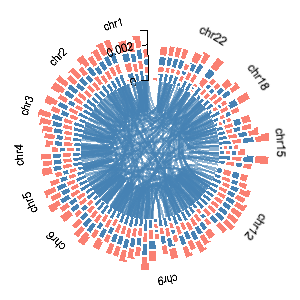

In [3]:
bar_base = gos.Track(data=mv).mark_bar().encode(
    x='start:G',
    xe='end:G',
    y='peak:Q',
    color=gos.Channel('sample:N', range=['steelblue', 'salmon', 'steelblue', 'salmon']),
    stroke=gos.Channel(value='white'),
    strokeWidth=gos.Channel(value=2),
)

bar_overview = gos.overlay(
    bar_base,
    bar_base.mark_brush().encode(x=gos.Channel(linkingId='detail-1')),
    bar_base.mark_brush().encode(x=gos.Channel(linkingId='detail-2'))
).properties(width=300, height=300)

link = gos.Track(data=sv).mark_withinLink().encode(
    x='p1s:G',
    xe='p2e:G',
    stroke=gos.Channel('chr1:N', range=['steelblue']),
    strokeWidth=gos.Channel(value=2),
    opacity=gos.Channel(value=0.6)
).properties(width=300, height=100)

overview = gos.stack(bar_overview, link).properties(layout="circular", spacing=1)

overview

View({
  arrangement: 'vertical',
  spacing: 20,
  views: (View({
    linkingId: 'detail-1',
    tracks: [Track({
      color: Channel({
        field: 'sample',
        range: ['steelblue', 'salmon', 'steelblue', 'salmon'],
        type: 'nominal'
      }),
      data: DataDeep({
        binSize: 2,
        categories: ['sample 1', 'sample 2', 'sample 3', 'sample 4'],
        column: 'position',
        row: 'sample',
        type: 'multivec',
        url: 'https://server.gosling-lang.org/api/v1/tileset_info/?d=cistrome-multivec',
        value: 'peak'
      }),
      height: 100,
      mark: 'bar',
      stroke: Channel({
        value: 'white'
      }),
      strokeWidth: Channel({
        value: 0
      }),
      width: 300,
      x: Channel({
        field: 'start',
        type: 'genomic'
      }),
      xe: Channel({
        field: 'end',
        type: 'genomic'
      }),
      y: Channel({
        field: 'peak',
        type: 'quantitative'
      })
    })],
    xDomain: Domain

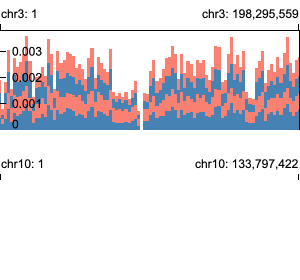

In [4]:
detail_1 = bar_base.encode(strokeWidth=gos.Channel(value=0)).properties(width=300, height=100).view(
    linkingId='detail-1',
    xDomain=gos.Domain(chromosome='3'),
)

detail_2 = bar_base.encode(strokeWidth=gos.Channel(value=0)).properties(width=300, height=100).view(
    linkingId='detail-2',
    xDomain=gos.Domain(chromosome='10'),
)

detail_view = gos.vertical(detail_1, detail_2).properties(spacing=20)
detail_view

# Compose Views

View({
  arrangement: 'horizontal',
  title: 'Overview and Detail Views',
  views: (View({
    alignment: 'stack',
    layout: 'circular',
    spacing: 1,
    tracks: (View({
      alignment: 'overlay',
      height: 300,
      tracks: [Track({
        color: Channel({
          field: 'sample',
          range: ['steelblue', 'salmon', 'steelblue', 'salmon'],
          type: 'nominal'
        }),
        data: DataDeep({
          binSize: 2,
          categories: ['sample 1', 'sample 2', 'sample 3', 'sample 4'],
          column: 'position',
          row: 'sample',
          type: 'multivec',
          url: 'https://server.gosling-lang.org/api/v1/tileset_info/?d=cistrome-multivec',
          value: 'peak'
        }),
        mark: 'bar',
        stroke: Channel({
          value: 'white'
        }),
        strokeWidth: Channel({
          value: 2
        }),
        x: Channel({
          field: 'start',
          type: 'genomic'
        }),
        xe: Channel({
          field: '

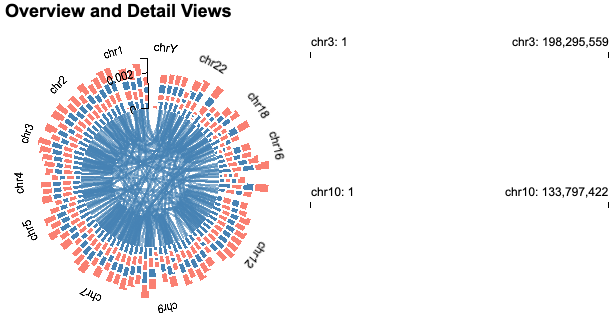

In [5]:
gos.horizontal(overview, detail_view).properties(
    title='Overview and Detail Views',
)